In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# League of Legends - Factors that affect the win rate
## How different factors change the course of the game

### Abstract
*Context*. The community of one of the most popular MOBA games for the last few years is growing significantly. More and more people around the world starts playing the game every day. With that in mind much more people are interested in how to get better at the game and what things should they look after when playing it. Even the gambling bussines has turned his gaze to the LCS (League Championship). Knowing this the necessity of different types of analysis pops up. 

*Aims*. One of the purposes of this paper is to explore how the different factors in the game are related to the probability of winning. And one of the questions that we are facing is "Is it possible to predict the result of a game by knowing almost every factor around the game for the first 10 minutes?". And is there significant difference between having the information for the first 10 minutes and the information for the next 5?

*Methods*. In the first part of this paper we are loading a 10000 observations for the first 10 minutes of the game and we are visualising how the different factors are realted with the game result. After that we are using logistic regression to try to predict the outcome of a game. Later on we are loading another dataset with another 10000 observations, but this time for the first 15 minutes of the game. We are making an experiment if we can train our model with the data from the first set and receive correct results for the second one. At last we are training our model and trying to predict the results with data only from the second dataset.

*Results*. The results of the model analysing the first data set has given us 70% accuracy with its predictions. The second model which supposed to predict the result of a game from the second dataset with training data from the first has given us only 55% accuracy. The last model, which have been trained with data from the second dataset, has given us 72% accuracy on his predictions for the results of the games from the second dataset.

*Conclusions*. Due to the dynamics of the game it's hard to predict the outcome having information for the first 10 minutes of the game only. For the same reason the second dataset has not given us good results. The reason why did the second model hasn't given us high results is, because the essential information which the two datasets bring is very different. Still, we speak about different periods of a time. Last, but not least, we can explore data for only one of the teams and even with small number of features without significant difference in the result.


### What is League of Legends?

League of Legends is MOBA (Multiplayer Online Battle Arena) video game developed and published by Riot Games. In LoL the players play the game as "champions" with unique abillities and fight in 5vs5 against another team of players or computer controlled champions. There are a few modes and maps on which the game can be played, but for this paper we will look at the classic ranked mode on the map "Summoner's rift" with 3 lanes and a jungle. The goal of the game is to destroy the enemy nexus (main structure) which is located at the heart of the enemy base, surrounded by defensive structures called towers.

During the course of the game the champions grow in strength (they level up) and buy items, using gold, which makes them stronger. They also complete different tasks called objectives. Objective can be killing an epic monster as a team (The Dragon or the Rift Herald), gaining additional benefits or destroying enemy structure, gaining additional gold. During the whole game minions (NPC troops) spawn in waves of 6 or 7 (every third wave is with 7th minion) at a time at each lane of each side (blue side and red side). This is one of the easiest ways to gain gold at the game. There are also minion camps in the jungle, which also are meant to give gold to the player, who has taken the role of a "jungler".

As a player you view the game in third person mode. You can see as further as the champion you are playing can see. Also you can see what other frienly champions can see and what friendly structures can see, which means there is a huge part of the map which stays hidden from you and visible to the enemy team, or hidden for both teams. There are things called "wards" or "warding totem", which can give you vision at places where there are no other friendly entities for a period of time. Placing wards and destroying enemy wards is an important part of the game since the vision control is very important (it's almost like killing a spy).

Last, but not least, the easiest way to take objectives is to kill enemy champions, so there is no one to interfere. Good vision control can greatly benefit any battle by surprising the enemies for example. Champion kills award most gold to the player who did the kill (300gold or a bounty, which is more) and a fixed amount of gold (150g) split between the players who assisted in the kill. The first champion kill in the game is called "first blood" and it awards more gold than the usual kills (400gold, this is why it's important).

### The ranking in the game, the dataset and the goal of the analysis

Depending on the win rate of the player he is placed in different ranking category. The higher the winrate is, the higher in the ladder the player goes where he can compete other players on the same level as him. The categories in the game are named (from the lowest to the highest): Iron, Bronze, Silver, Gold, Platinum, Diamond, Master, Grandmaster and Challenger. Each category, except the last three, is divided in four subcategories from one to four in roman numerals (Iron IV, Iron III, Iron II, Iron I) where IV being the lowest and I being the highest. Why is this important for our analysis? It is important, because in the different ELO groups different factors have different importance. For example in low ELO (Iron IV to Silver I) vision control is not as important as it is in high ELO (Diamond IV to Chalenger). From Diamond IV to Challenger there is no great difference in which factors have most importance, the important thing there is the personal abillities of the player and how he react and knows to play his champion.

Our dataset consists of the events that took place the first 10 minutes of almost 10 000 ranked games from high ELO (Diamond I to Master) and each game is unique. There are 19 features per team (blue and red team) which results in 38 columns, 1 column **blueWins** which indicates the winner of the game and 1 column for the game id. The data is cleaned and there are no missing values.

This analysis can give us information how important are the first 10 minutes of the game and which factors give us most information about how the game will result. The averange length of a game in this ELO is betwenn 25:46 and 26:32 minutes.

### Reading and "cleaning" the data

First of all we will read our data, set our index and visualise it. After that we will check the shape of the dataframe and show the unique columns with their data types. 

In [3]:
game_10m_data = pd.read_csv("data\diamond1_masters_10min\high_diamond_ranked_10min.csv")
game_10m_data = game_10m_data.set_index("gameId")
game_10m_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527873286,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
4527797466,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
4527713716,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9


In [4]:
game_10m_data.shape

(9879, 39)

In [5]:
game_10m_data.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


As we explore the data we see that some of the columns have duplicate information and we can drop them. We will start exploring the data in the columns from left to right, to check for data that we don't need.

* The column **blueFirstBlood** contains ones and zeros, respectively 1 for True (blue team has taken first blood) and 0 for False (red team has taken first blood). The column **redFirstBlood** contains the exact same information, but the opposite, so we can drop one of them.

* We expect the column **blueKills** to match the column **redDeaths** and respectively the opposite - **redKills** to match **blueDeaths**, but there are othere factors which can result in difference between the columns (player killed by jungle camp or elite monster), so we will leave these for now.

* The columns **blueTotalExperience**, **blueExperienceDiff**, **redTotalExperince** and **redExperienceDiff** in pairs contain the same information. If we have **blueTotalExperience** and **blueExperienceDiff** we can tell what is **redTotalExperince**, so we will drop **redTotalExperince** and **redExperienceDiff**.

* We can say exactly the same for the columns **blueTotalGold**, **blueGoldDiff**, **redTotalGold** and **redGoldDiff**, so we will drop the red ones.

* Further exploration of the data lead us to seeing that an important factor is forgotten. It is the kill participation. This factor shows a number between 0 and 1 which contains the information about what percentage of the kills involved the entire team. This factor can give us information about whether the team is good together, or there are 1 or 2 players which are better than the others. We can have this in mind, but since there is no data about this factor we can't take it into account.

* Another forgotten factor is the first tower bonus gold, but as we don't have that information we can't consider it.

For the sake of the example we will display the information in the experience columns.

In [6]:
game_10m_data[["blueTotalExperience", "redTotalExperience", "blueExperienceDiff", "redExperienceDiff"]]

,blueTotalExperience,redTotalExperience,blueExperienceDiff,redExperienceDiff
gameId,,,,
4519157822,17039,17047,-8,8
4523371949,16265,17438,-1173,1173
4521474530,16221,17254,-1033,1033
4524384067,17954,17961,-7,7
4436033771,18543,18313,230,-230
...,...,...,...,...
4527873286,18967,16498,2469,-2469
4527797466,19255,18367,888,-888
4527713716,18032,19909,-1877,1877


In [7]:
game_10m_data = game_10m_data.drop(["redFirstBlood", "redTotalExperience", "redExperienceDiff", "redTotalGold", "redGoldDiff"], axis = 1)

In [8]:
game_10m_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,197,55,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,240,52,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,203,28,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,235,47,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,225,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527873286,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,6.8,229,34,22.9,1524.6
4527797466,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,7.0,206,56,20.6,1545.6
4527713716,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,7.4,261,60,26.1,1831.9


In [9]:
game_10m_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,197,55,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,240,52,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,203,28,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,235,47,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,225,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527873286,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,6.8,229,34,22.9,1524.6
4527797466,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,7.0,206,56,20.6,1545.6
4527713716,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,7.4,261,60,26.1,1831.9


### Exploring the data

Now when we are done with the preparation of the data we should do some exploring and visualisation. To make our work easier we will split our analysis in few different categories: vision control, objectives, champion kills, farming, and last, but not least gold and levels. After that we will analyze the complex impact of all factors using logistic regression.

First of all we must check if the color of the team has anything to do with the win rate. We don't expect such thing for two reasons - First because the game should be balanced and if one of the teams is favored all the players would want to play at that team. Second, because we can't say for sure that this data is representive sample.


In [10]:
game_results = game_10m_data.groupby(game_10m_data.blueWins).size()

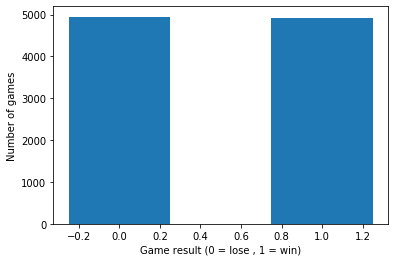

In [11]:
plt.bar(game_results.index, game_results, width = 0.5)
plt.xlabel("Game result (0 = lose , 1 = win)")
plt.ylabel("Number of games")
plt.show()

As we see from the graphic there is no significant difference between the wins and the losses. Just to be sure we can do 2 things, the first is to calculate and show it with numbers and second thing is to check it in the internet.

In [12]:
total_games = len(game_10m_data.blueWins)
wins = sum(game_10m_data.blueWins)
losses = total_games - wins
print(f"Blue team win rate is {(wins/total_games)*100:.2f}%")
print(f"Red team win rate is {(losses/total_games)*100:.2f}%")

Blue team win rate is 49.90%
Red team win rate is 50.10%


According to "League of graphs" for Diamond games with length between 25 to 35 minutes the average win rate for blue team is 50.10%, respectively 49.90% for the red team. Our results are not that different, which in some way means that we can assume that our sample is representive.

In each category I will be showing a few features for both the blue and the red team. Showing their differences or similarity in the behaviour.

#### Vision control

Now let's see how the vision control interfere with our win rate. Let's start with the placed wards by the blue team.

In [13]:
blue_wins_data = game_10m_data[game_10m_data.blueWins == 1]
red_wins_data = game_10m_data[game_10m_data.blueWins == 0]

In [14]:
blue_wards_placed = blue_wins_data.groupby(blue_wins_data.blueWardsPlaced).size()
blue_wards_placed

blueWardsPlaced
5       1
7       1
8       6
9      16
10     42
       ..
176     1
183     1
185     1
203     1
250     1
Length: 127, dtype: int64

In [15]:
def ploting_grouped_elements(group, xtext, ytext, type_of_plot = "bar"):
    if type_of_plot == "bar":
        plt.bar(group.index, group)
    elif type_of_plot == "line":
        plt.plot(group.index, group)
    elif type_of_plot == "hist":
        plt.hist(group.index)
    plt.xlabel(xtext)
    plt.ylabel(ytext)
    plt.show()

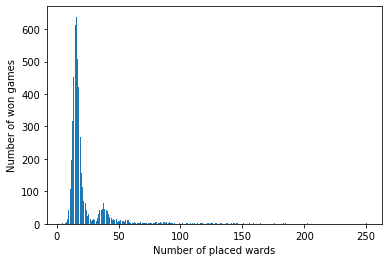

In [16]:
ploting_grouped_elements(blue_wards_placed, "Number of placed wards", "Number of won games")

This is an interesting results for a few reasons. 

The first reason is that we have a huge peak somewhere between 0 and 25 placed wards. It's easy to assume that with the number of placed wards increasing we will have increased number of won games, but as we see it's not like that. The reason for this is that vision control is complex factor consisting of other things besides the placed wards of one of the teams. Another reason for this is that we don't have that much games in which people place more than 50 wards. But this is the reasoning of a person who has knowledge of the game.

Another reason which makes the plot interesting is the long tale that continues even after 150 placed wards.

Let's see where exactly is this peak and divide the graphic in smaller ones.

In [17]:
blue_wards_placed.idxmax(), blue_wards_placed.max()

(16, 638)

In [18]:
bpw_part_1 = blue_wards_placed[(blue_wards_placed.index < 100)]
bpw_part_2 = blue_wards_placed[(blue_wards_placed.index >= 100) & (blue_wards_placed.index <= 160)]
bpw_part_3 = blue_wards_placed[(blue_wards_placed.index > 160)]

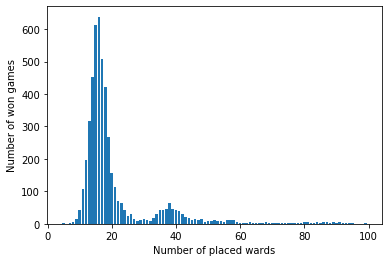

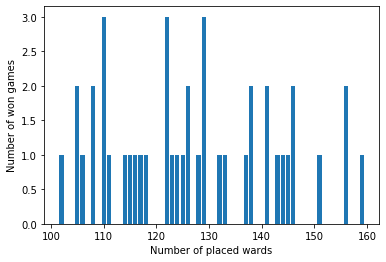

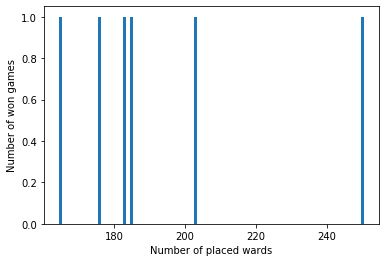

In [19]:
ploting_grouped_elements(bpw_part_1, "Number of placed wards", "Number of won games")
ploting_grouped_elements(bpw_part_2, "Number of placed wards", "Number of won games")
ploting_grouped_elements(bpw_part_3, "Number of placed wards", "Number of won games")

As we can see from the upper plots there are not much games where more than 50 wards are placed and had been won.

Now let's see the placed wards from the red team. We can assume that we will get similar results.

In [20]:
red_wards_placed = red_wins_data.groupby(red_wins_data.redWardsPlaced).size()
red_wards_placed

redWardsPlaced
7       2
8       2
9      18
10     42
11     92
       ..
193     1
205     1
216     1
230     1
276     1
Length: 132, dtype: int64

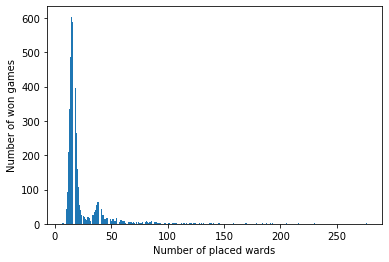

In [21]:
ploting_grouped_elements(red_wards_placed, "Number of placed wards", "Number of won games")

As we assumed the results are very similar. Most won games are divided in 2 main groups where the winning team places less than 20 or between 30 and 45 wards.

At last let's see how destroying wards relates to the win rate.

In [22]:
blue_wards_destroyed = blue_wins_data.groupby(blue_wins_data.blueWardsDestroyed).size()
blue_wards_destroyed

blueWardsDestroyed
0      324
1      850
2     1173
3     1050
4      723
5      406
6      205
7       88
8       35
9       17
10       8
11       7
12       6
13       5
14       3
15       7
16       6
17       4
18       7
19       2
20       1
21       2
24       1
dtype: int64

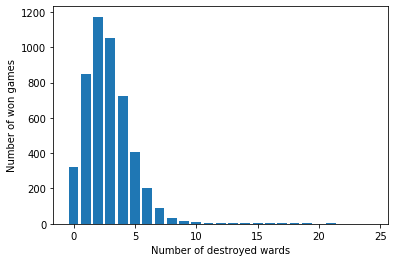

In [23]:
ploting_grouped_elements(blue_wards_destroyed, "Number of destroyed wards", "Number of won games")

In [24]:
red_wards_destroyed = red_wins_data.groupby(red_wins_data.redWardsDestroyed).size()
red_wards_destroyed

redWardsDestroyed
0      333
1      920
2     1164
3     1059
4      732
5      396
6      179
7       72
8       27
9       15
10       4
11       4
12       3
13       9
14       4
15       5
16       4
17       4
18       4
19       4
20       3
22       2
24       2
dtype: int64

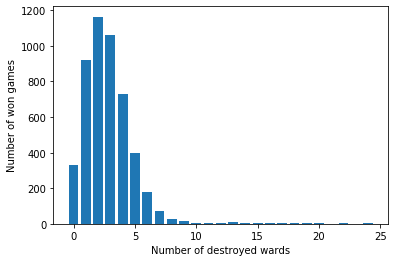

In [25]:
ploting_grouped_elements(red_wards_destroyed, "Number of destroyed wards", "Number of won games")

From the upper two plots we see that in the majority of games players destroy between 0 and 10 wards and in most of them between 0 and 5. This doesn't give us much information. We should study the combination of placed and destroyed wards to make and assumption how does the vision control affects the result of the game.

#### Objectives

Here we will see how killing elite monsters and destroying towers is related with the win rate. Let's start with killing the Dragon. 

In [26]:
blue_dragons = blue_wins_data.groupby(blue_wins_data.blueDragons).size()
blue_dragons

blueDragons
0    2638
1    2292
dtype: int64

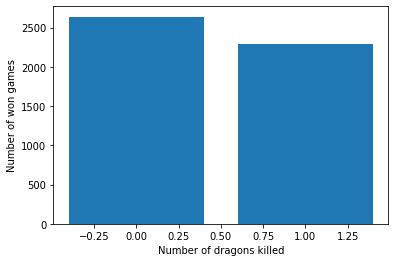

In [27]:
ploting_grouped_elements(blue_dragons, "Number of dragons killed", "Number of won games")

In [28]:
red_dragons = red_wins_data.groupby(red_wins_data.redDragons).size()
red_dragons

redDragons
0    2395
1    2554
dtype: int64

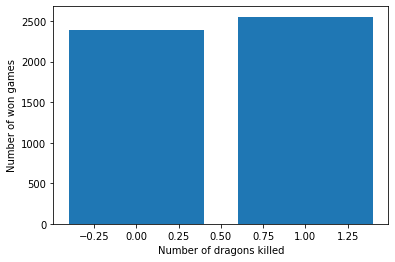

In [29]:
ploting_grouped_elements(red_dragons, "Number of dragons killed", "Number of won games")

That's interesting, it looks like that the first dragon don't have much of an impact on the course of the game. Or atleast his impact is not in the first 10 minutes of the game.

How about the Herald?

In [30]:
blue_heralds = blue_wins_data.groupby(blue_wins_data.blueHeralds).size()
blue_heralds

blueHeralds
0    3825
1    1105
dtype: int64

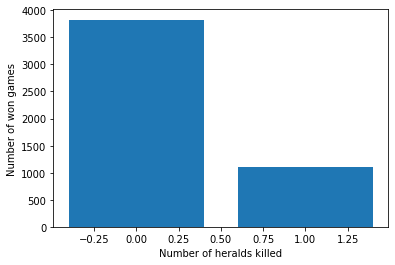

In [31]:
ploting_grouped_elements(blue_heralds, "Number of heralds killed", "Number of won games")

In [32]:
red_heralds = red_wins_data.groupby(red_wins_data.redHeralds).size()
red_heralds

redHeralds
0    3981
1     968
dtype: int64

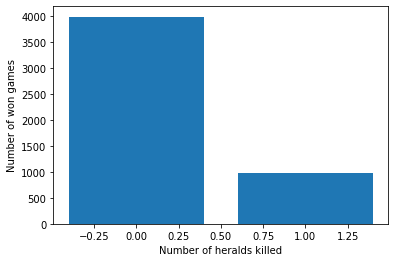

In [33]:
ploting_grouped_elements(red_heralds, "Number of heralds killed", "Number of won games")

Even more interesting! Looks like the teams, don't kill the Herald that oftten in the first 10 minutes of the game.

Let's take a look at the destroyed towers.

In [34]:
blue_towers_destroyed = blue_wins_data.groupby(blue_wins_data.blueTowersDestroyed).size()
blue_towers_destroyed

blueTowersDestroyed
0    4580
1     316
2      26
3       7
4       1
dtype: int64

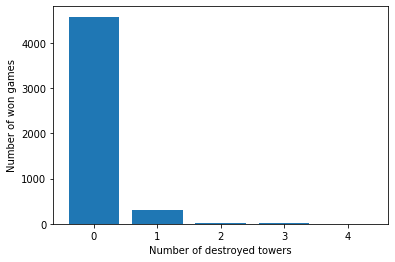

In [35]:
ploting_grouped_elements(blue_towers_destroyed, "Number of destroyed towers", "Number of won games")

In [36]:
red_towers_destroyed = red_wins_data.groupby(red_wins_data.redTowersDestroyed).size()
red_towers_destroyed

redTowersDestroyed
0    4647
1     280
2      22
dtype: int64

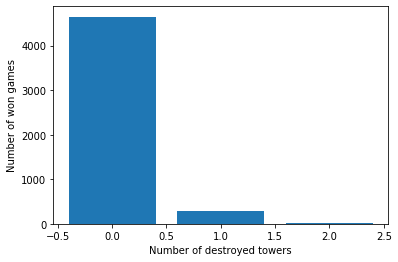

In [37]:
ploting_grouped_elements(red_towers_destroyed, "Number of destroyed towers", "Number of won games")

As we can see in most of the won games there are no destroyed towers in the first 10 minutes. However something that makes an impression are the few observations from the **blue_wins_data** dataframe that are for 3 and 4 destroyed towers. We can assume that this is not something that usually happens, but we can't neglect that it actually happened, so we can't ignore them.

Taking into account that in the first 10 minutes of the game not much happened in terms of objectives we can assume that the players were "farming"(killing minions) or fighting each other. Let's see the minion kills.

#### Farming

In this category fall the minion kills and the jungle monster kills. Let's see how does this go.

In [38]:
blue_minion_kills = blue_wins_data.groupby(blue_wins_data.blueTotalMinionsKilled).size()
blue_minion_kills

blueTotalMinionsKilled
143    1
144    1
145    1
149    1
150    1
      ..
275    1
276    6
279    2
281    1
283    1
Length: 130, dtype: int64

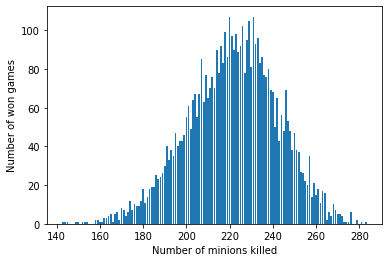

In [39]:
ploting_grouped_elements(blue_minion_kills, "Number of minions killed", "Number of won games")

In [40]:
red_minion_kills = red_wins_data.groupby(red_wins_data.redTotalMinionsKilled).size()
red_minion_kills

redTotalMinionsKilled
143    1
147    1
151    1
153    2
154    2
      ..
278    1
279    1
280    1
282    1
289    1
Length: 131, dtype: int64

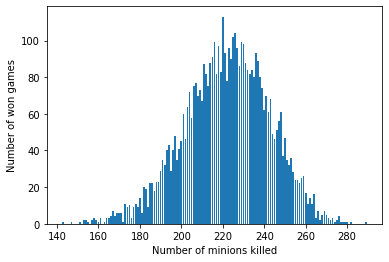

In [41]:
ploting_grouped_elements(red_minion_kills, "Number of minions killed", "Number of won games")

In [42]:
blue_avg_mkills = round(game_10m_data.blueTotalMinionsKilled.mean())
red_avg_mkills = round(game_10m_data.redTotalMinionsKilled.mean())
print("Blue team average minion kills are " + str(blue_avg_mkills)+".")
print("Red team average minion kills are " + str(red_avg_mkills)+".")

Blue team average minion kills are 217.
Red team average minion kills are 217.


It's not surprising that we get similar results for the both team, after all we talk about people who are on the same skill level. According to the Internet the result of average 217 minions kills per team for 10 minutes is normal. The average for a player is 72, so we have 3 lanes with a player farming on each, 1 support and 1 jungler, which is great.

Let's visualise the kills of the jungle monsters. 

In [43]:
blue_jungle_minion_kills = blue_wins_data.groupby(blue_wins_data.blueTotalJungleMinionsKilled).size()
blue_jungle_minion_kills

blueTotalJungleMinionsKilled
4     1
16    1
21    2
23    2
24    7
     ..
83    3
84    2
85    2
88    1
92    1
Length: 68, dtype: int64

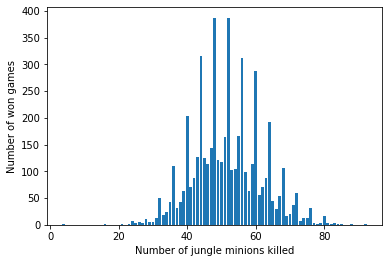

In [44]:
ploting_grouped_elements(blue_jungle_minion_kills, "Number of jungle minions killed", "Number of won games")

In [45]:
red_jungle_minion_kills = red_wins_data.groupby(red_wins_data.redTotalJungleMinionsKilled).size()
red_jungle_minion_kills

redTotalJungleMinionsKilled
17    1
22    1
23    1
24    5
26    4
     ..
83    2
84    9
88    3
89    1
92    3
Length: 66, dtype: int64

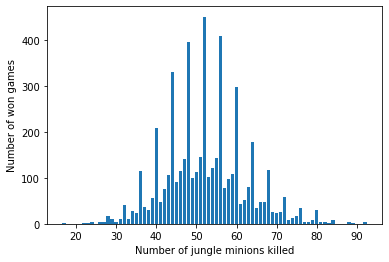

In [46]:
ploting_grouped_elements(red_jungle_minion_kills, "Number of jungle minions killed", "Number of won games")

The interesting thing about these plots are the peaks, which apear in repeatable model. We observe this on both teams.

Let's take a closer look.

In [47]:
bjmk_part_1 = blue_jungle_minion_kills[(blue_jungle_minion_kills.index >= 40) & (blue_jungle_minion_kills.index <= 60)]

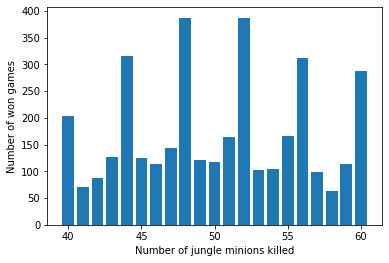

In [48]:
ploting_grouped_elements(bjmk_part_1, "Number of jungle minions killed", "Number of won games")

It seems that the peaks are repeating on every even number multiple of four. Why is that?

For now we can't say. Let's continue the visualisations with the average KDA ratio which we calculated earlier.

#### Champion kills

Here we will show the kills, deaths and assists of the blue team.

In [49]:
blue_kills = blue_wins_data.groupby(blue_wins_data.blueKills).size()
blue_kills

blueKills
0       9
1      60
2     149
3     255
4     483
5     550
6     675
7     633
8     565
9     493
10    373
11    254
12    164
13    132
14     54
15     32
16     29
17     13
18      4
19      2
22      1
dtype: int64

In [50]:
blue_deaths = blue_wins_data.groupby(blue_wins_data.redDeaths).size()
blue_deaths

redDeaths
0       9
1      60
2     149
3     255
4     483
5     550
6     675
7     633
8     565
9     493
10    373
11    254
12    164
13    132
14     54
15     32
16     29
17     13
18      4
19      2
22      1
dtype: int64

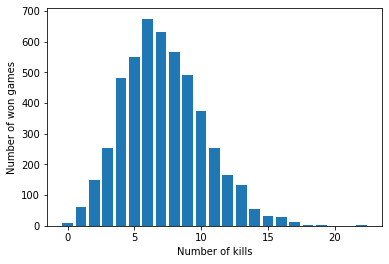

In [51]:
ploting_grouped_elements(blue_kills, "Number of kills", "Number of won games")

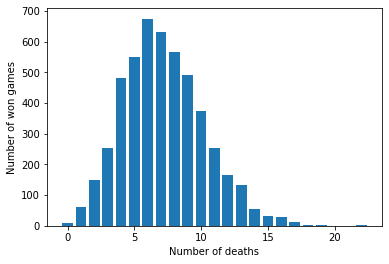

In [52]:
ploting_grouped_elements(blue_deaths, "Number of deaths", "Number of won games")

In [53]:
blue_assists = blue_wins_data.groupby(blue_wins_data.redAssists).size()
blue_assists

redAssists
0     194
1     352
2     480
3     571
4     575
5     566
6     482
7     417
8     329
9     283
10    208
11    152
12     95
13     71
14     53
15     37
16     27
17     11
18      8
19      8
20      6
22      2
23      1
24      1
25      1
dtype: int64

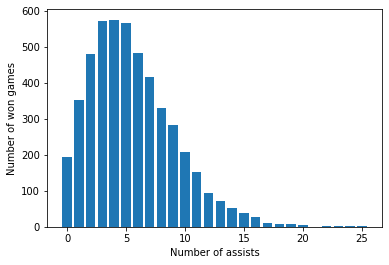

In [54]:
ploting_grouped_elements(blue_assists, "Number of assists", "Number of won games")

These results do not surprise us. As I mentioned earlier we expect the kills in a game to be equal to the deaths. Respectively their plots should be similar.

#### Gold difference and levels

This is the last category we are going to inspect. It is about how the gold difference and the average level of the team until the tenth minute is related to the win rate.

In [55]:
blue_gold_diff = blue_wins_data.groupby(blue_wins_data.blueGoldDiff).size()
blue_gold_diff

blueGoldDiff
-6324     1
-5976     1
-5057     1
-4949     1
-4907     1
         ..
 8667     1
 8776     1
 8863     1
 8977     1
 11467    1
Length: 3651, dtype: int64

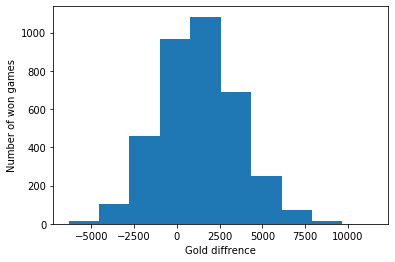

In [56]:
ploting_grouped_elements(blue_gold_diff, "Gold diffrence", "Number of won games", "hist")

The negative values mean games that the blue team have "played from behind" with lack of gold around the tenth minute, but still won. The positive values, respectively, mean that these are games, which the blue team has won by having more gold than the enemy team by the tenth minute. 

The thing we see in the plot is that the histogram is slightly moved to the right. This is because we expect blue team to win much more games by playing with gold advantage rather than with disadvantage. 

Let's take a quick look at the average levels of the teams.

In [57]:
blue_avg_level = blue_wins_data.groupby(blue_wins_data.blueAvgLevel).size()
blue_avg_level

blueAvgLevel
6.0       3
6.2      23
6.4     108
6.6     370
6.8    1064
7.0    1441
7.2    1192
7.4     548
7.6     152
7.8      28
8.0       1
dtype: int64

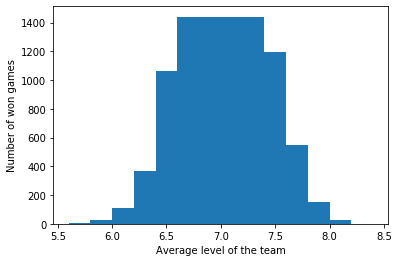

In [58]:
ploting_grouped_elements(blue_avg_level, "Average level of the team", "Number of won games")

In [59]:
red_avg_level = red_wins_data.groupby(red_wins_data.redAvgLevel).size()
red_avg_level

redAvgLevel
6.0       7
6.2      20
6.4     104
6.6     382
6.8     977
7.0    1449
7.2    1256
7.4     567
7.6     168
7.8      15
8.0       3
8.2       1
dtype: int64

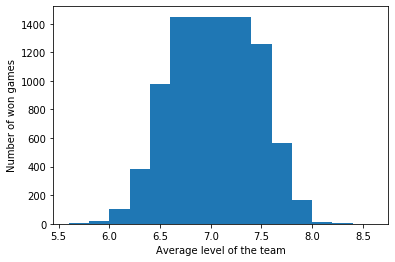

In [60]:
ploting_grouped_elements(red_avg_level, "Average level of the team", "Number of won games")

As we see in both plots at the tenth minute the average level of the team was around 7.

### Creating a model

Now, let's try to create a model and try to predict the result of a game given all this parameters from the first 10 minutes of the game.

For this model we will use the logistic regression given by the **sklearn** library in Python. We will split the dataset in two parts - training set and prediction set. The first we will use to train our model to make predictions and with the second one we will test it.

In [61]:
lr_model = LogisticRegression()

In [62]:
target_game10m_data = game_10m_data["blueWins"]
features_game10m_data = game_10m_data.drop(["blueWins"], axis = 1)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features_game10m_data, target_game10m_data, test_size = 0.2, random_state = 10)

In [64]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
lr_result = lr_model.predict(x_test)
print(accuracy_score(lr_result, y_test))

0.7064777327935222


We got 70,65% accuracy without doing much with the data. This result is expected, because, as I mentioned earlier, the average length of a game in this ELO is around 26 minutes, so the first 10 minutes might not be the most important. I wonder what will happen if we split the data in two sets, with features only for one of the teams each and explore the blue team data.

In [66]:
blue_features = []
for col in list(game_10m_data):
    if(col[0] == "b"):
        blue_features.append(col)

In [67]:
blue_features_game10m_data = game_10m_data[blue_features]

In [68]:
blue_features_game10m_data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [69]:
blue_features_game10m_data = blue_features_game10m_data.drop(["blueWins"], axis = 1)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(blue_features_game10m_data, target_game10m_data, test_size = 0.2, random_state = 10)

In [71]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lr_result = lr_model.predict(x_test)
print(accuracy_score(lr_result, y_test))

0.7059716599190283


Well, so it looks like it doesn't matter if we use the features for both teams or for one of them.

Now let's try something different. Let's load the other dataset with data the same kind of data, but except that it is for the first 15 minutes of the game. Let's train our model with the data from the first dataset and try to predict the second. This way we can see if the next 5 minutes change the factors that impact the result of the game the most.

In [73]:
game_15m_data = pd.read_csv("data\diamond4_diamond1_15min\MatchTimelinesFirst15.csv")

In [74]:
game_15m_data

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,48646,3.475682e+09,0,27013.0,338.0,61.0,9.0,31853.0,331.0,77.0,9.6,14.0,2.0,0.0,2.0,21.0,0.0,0.0,0.0
48647,48647,3.500988e+09,1,25376.0,350.0,91.0,9.0,23786.0,354.0,87.0,9.4,7.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
48648,48648,3.496593e+09,0,25456.0,308.0,92.0,9.0,29569.0,344.0,96.0,9.6,8.0,0.0,0.0,2.0,17.0,3.0,0.0,1.0
48649,48649,3.491706e+09,1,27033.0,335.0,85.0,9.4,25666.0,316.0,64.0,8.8,14.0,2.0,0.0,0.0,12.0,0.0,0.0,0.0


In [75]:
game_15m_data.shape

(48651, 19)

The first thing that we notice is that the columns are less and their names are different we have to fix that. To make it easier we will take only the features for the blue team. We will rename them to be the same as the features from the previous set and will drop some of the features of the previous set to make them similar.

The other thing is that this dataset is a lot bigger than the previous one, so we will take only part of it. Let's say 10 000 observations.

In [76]:
game_15m_data = game_15m_data.sample(10000)

In [77]:
blue_features_15m = []
for col in list(game_15m_data):
    if(col[0] == "b"):
        blue_features_15m.append(col)

blue_features_game15m_data = game_15m_data[blue_features_15m]

In [78]:
blue_features_game15m_data

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed
34693,1,24411.0,387.0,87.0,9.0,6.0,2.0,0.0,0.0
27733,1,27071.0,329.0,69.0,9.0,10.0,2.0,0.0,0.0
6331,1,22872.0,355.0,89.0,9.0,4.0,0.0,0.0,1.0
3066,0,23862.0,307.0,86.0,9.0,6.0,0.0,0.0,2.0
38781,1,25397.0,299.0,76.0,9.0,11.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
29589,0,28406.0,359.0,80.0,9.6,15.0,0.0,0.0,1.0
41018,0,27049.0,323.0,86.0,9.2,12.0,3.0,0.0,0.0
17297,1,29415.0,331.0,58.0,9.4,18.0,1.0,0.0,0.0
36786,1,28805.0,348.0,85.0,9.2,12.0,2.0,0.0,0.0


In [79]:
blue_target_game15m_data = blue_features_game15m_data["blue_win"]
blue_target_game15m_data.head()

34693    1
27733    1
6331     1
3066     0
38781    1
Name: blue_win, dtype: int64

In [80]:
blue_features_game15m_data = blue_features_game15m_data.assign(blueKills = blue_features_game15m_data["blueChampKills"], 
                                                               blueDragons = blue_features_game15m_data["blueDragonKills"],
                                                               blueHeralds = blue_features_game15m_data["blueHeraldKills"], 
                                                               blueTotalGold = blue_features_game15m_data["blueGold"], 
                                                               blueTotalMinionsKilled = blue_features_game15m_data["blueMinionsKilled"], 
                                                               blueTotalJungleMinionsKilled = blue_features_game15m_data["blueJungleMinionsKilled"])

In [81]:
blue_features_game15m_data.drop(["blue_win", "blueChampKills", "blueDragonKills", "blueHeraldKills", "blueGold", "blueMinionsKilled", "blueJungleMinionsKilled"], axis = 1)

,blueAvgLevel,blueTowersDestroyed,blueKills,blueDragons,blueHeralds,blueTotalGold,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
34693,9.0,0.0,6.0,0.0,2.0,24411.0,387.0,87.0
27733,9.0,0.0,10.0,0.0,2.0,27071.0,329.0,69.0
6331,9.0,1.0,4.0,0.0,0.0,22872.0,355.0,89.0
3066,9.0,2.0,6.0,0.0,0.0,23862.0,307.0,86.0
38781,9.0,2.0,11.0,0.0,2.0,25397.0,299.0,76.0
...,...,...,...,...,...,...,...,...
29589,9.6,1.0,15.0,0.0,0.0,28406.0,359.0,80.0
41018,9.2,0.0,12.0,0.0,3.0,27049.0,323.0,86.0
17297,9.4,0.0,18.0,0.0,1.0,29415.0,331.0,58.0
36786,9.2,0.0,12.0,0.0,2.0,28805.0,348.0,85.0


In [82]:
blue_features_game15m_data = blue_features_game15m_data[["blueKills", "blueDragons", "blueHeralds", "blueTowersDestroyed", "blueTotalGold", "blueAvgLevel", "blueTotalMinionsKilled", "blueTotalJungleMinionsKilled"]]
blue_features_game15m_data.head()

,blueKills,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
34693,6.0,0.0,2.0,0.0,24411.0,9.0,387.0,87.0
27733,10.0,0.0,2.0,0.0,27071.0,9.0,329.0,69.0
6331,4.0,0.0,0.0,1.0,22872.0,9.0,355.0,89.0
3066,6.0,0.0,0.0,2.0,23862.0,9.0,307.0,86.0
38781,11.0,0.0,2.0,2.0,25397.0,9.0,299.0,76.0


In [83]:
blue_features_game10m_data.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,
4519157822,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
4523371949,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
4521474530,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
4524384067,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4436033771,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [84]:
blue_features_game10m_data = blue_features_game10m_data.drop(["blueWardsPlaced", "blueWardsDestroyed", "blueFirstBlood", "blueDeaths", "blueAssists", "blueEliteMonsters", "blueTotalExperience", "blueGoldDiff", "blueExperienceDiff", "blueCSPerMin", "blueGoldPerMin"], axis = 1)

In [85]:
blue_features_game10m_data.head()

,blueKills,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
gameId,,,,,,,,
4519157822,9,0,0,0,17210,6.6,195,36
4523371949,5,0,0,0,14712,6.6,174,43
4521474530,7,1,0,0,16113,6.4,186,46
4524384067,4,0,1,0,15157,7.0,201,55
4436033771,6,0,0,0,16400,7.0,210,57


Now we have two similar dataframes, one for 10 minutes into the game and one for 15 minutes into the game. Let's experiment what will happen if we train our model with the data from the "ten minutes dataset" and make him predict the results from the "fiftheen minutes dataset".

In [86]:
x_train = blue_features_game10m_data
y_train = game_10m_data["blueWins"]
x_test = blue_features_game15m_data
y_test = blue_target_game15m_data

In [87]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
lr_result = lr_model.predict(x_test)
print(accuracy_score(lr_result, y_test))

0.5502


Well, we can say that this approach is not effective at all and that we actually expected this. The reason for this is because the two dataset are for different period of time from the game.

Anyway, let's try the logistic regression model on the "fifteen minutes dataset" just for the sake of the example.

In [89]:
x_train, x_test, y_train, y_test = train_test_split(blue_features_game15m_data, blue_target_game15m_data, test_size = 0.2, random_state = 10)

In [90]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
lr_result = lr_model.predict(x_test)
print(accuracy_score(lr_result, y_test))

0.7245


This result tell us that no matter of the less number of features presented in this dataset it gives us somehow similar results.

Overall we learned that to get reasonable and realistic results the most important thing is to "compare apples with apples".

**References:**
* [LoL - Diamond I to Master Dataset](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
* [LoL - Diamond IV to Diamond I Dataset](https://www.kaggle.com/benfattori/league-of-legends-diamond-games-first-15-minutes)
* [Legendary game prediction analysis - Notebook](https://www.kaggle.com/adityaaggarwal09/legendary-game-prediction-analysis)
* [League of graphs](https://www.leagueofgraphs.com/)
* [Life of Data. Data Science is OSEMN](https://medium.com/breathe-publication/life-of-data-data-science-is-osemn-f453e1febc10)
* [Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
* [Logistic Regression using Python (scikit-learn) - Youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM&feature=emb_title)
* ... and many more